# Support Vector Machine(SVM):
        
 A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular Supervised Learning algorithms in Machine Learning. However, primarily, it is used for Classification problems in Machine Learning.
 The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.This hyperplane is called as Margin Maximizing Hyperplane. This hyperplane maximize the margin(distance between positive nad negative hyperplane which is parallel hyperplane) . Margin increases Generalization Accuracy(accuracy of unseen data) and decreases chance of misclassification. 
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme vectors are called as Support Vectors, and hence algorithm is termed as Support Vector Machine. 
  
  
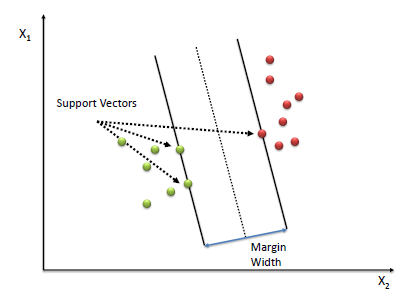
 
Types of SVM:
 
Two types of svm is there:

1) Linear SVM : Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

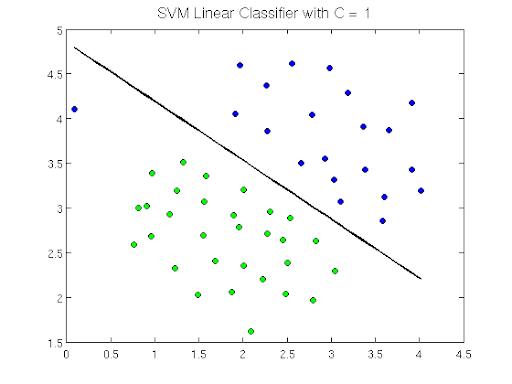

2)Non-Linear SVM/ Kernel SVM : Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.
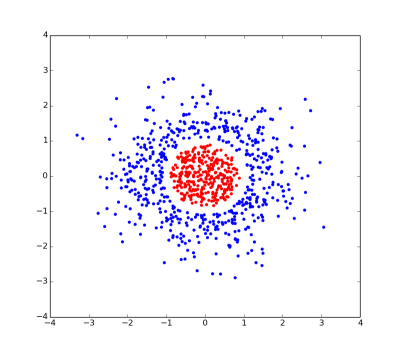
 

  
  
  
  
The equation of soft-margin svm is-

$$\mathscr{L}(\mathbf{w},\mathbf{b}) = \frac{\|\mathbf{w}\|^2}{2} + c\left[\frac{1}{N}\sum_{i=1}^{N} max(0, 1-y_i(\mathbf{w}^Tx_i+b))\right]$$

Here the first part is the margin and the part multiplied by 'c' is called "Hinge Loss".

The value if 'c' is always > 0.
The higher the value of 'c' the model tends to overfit to the training data and the smaller the value, the model tends to underfit to the same.

Let’s see how can we calculate the total cost as given in the equation and then we will move on to its gradient which will be used in the training phase to minimize it:
  
  
  
  

### The Gradient of the Cost Function:
for calculating the gradient of w$$\frac{\partial \mathscr{L}(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{1}{N}\sum_{i=1}^{N}w$$
if $$max(0, 1-y_i(\mathbf{w}^Tx+b))=0$$
otherwise, the value is $$\mathbf{w}-Cy_ix_i$$
similarly for b$$\frac{\partial \mathscr{L}(\mathbf{w},b)}{\partial \mathbf{b}} = \frac{1}{N}\sum_{i=1}^{N}0$$
if$$max(0, 1-y_i(\mathbf{w}^Tx+b))=0$$
otherwise, the value is $$\mathbf-Cy_i$$

 ### Below is the implementation of Linear SVM from scratch:

In [11]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset and reading it
df=pd.read_csv("breast_cancer_data.csv")
#Preprocessing of data
#as SVM takes only numeric data so convert the diagnosis column as numeric 1 and -1
diagnosis_map={"M":1.0,"B":-1.0}
#mapping diagnosis_map to diagnosis column
df["diagnosis"]=df["diagnosis"].map(diagnosis_map)
#drop the unnecessary columns from data
df.drop(df.columns[[-1,0]],axis=1,inplace=True)

In [3]:
#splitting the data and normalized it
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_normalized=StandardScaler().fit_transform(X_train)
X_test_normalized=StandardScaler().fit_transform(X_test)

In [6]:
#make class for writing all working functions
class SVM:
    #init method to initialize parameters
    def __init__(self,C=1.0,tol=0.001):
        #C is hyperparameter
        self.C=C
        # tolerance is threshold
        self.tolerance=tol
        self.learning_rate=0.00001
        self.W=None
        self.b=None
        
    #computing the loss function
    def compute_loss(self,X,Y):
        n=X.shape[0]
        #calculating zita(distance of misclassified pt from correct hyperplane)
        zita = 1-(Y*(np.dot(X,self.W)+self.b))
        zita[zita<0]=0
        #computing hinge_loss(loss in SVM)
        hinge_loss=self.C*(np.sum(zita)/n)
        #computing total_loss(regularization+hinge_loss)
        total_loss=(1/2*np.dot(self.W,self.W))+hinge_loss
        #returning the loss
        return total_loss
    #computing gradient of loss
    def loss_gradient(self,X_batch,Y_batch):
        #converting ,Y in numpy array
        if type(Y_batch)==np.float64:
            X_batch=np.array([X_batch])
            Y_batch=np.array([Y_batch])
        #computing zita 
        zita = 1-(Y_batch*(np.dot(X_batch,self.W)+self.b))
        #setting the gradient of w(weights) to zeros using numpy.zeros
        dw=np.zeros(len(self.W))
        #setting the gradient of b(bias) to 0
        db=0
        #looping through zita,to calculate gradient of weight(w) and bias(b)
        for key,d in enumerate(zita):
            #calculating gradient for each row
            if max(0,d)==0:
                di=self.W
                dj=0
            else:
                di=self.W-(self.C*Y_batch[key]*X_batch[key])
                dj=-(self.C*Y_batch[key])
            #summing the gradients
            dw+=di
            db+=dj
        #taking the average of gradients
        dw=dw/len(Y_batch)
        db=db/len(Y_batch)
        #returning the gradients
        return dw,db
    #fit the previous loss functions to X,Y
    def fit(self,X,Y):
        #initializing weight(w) with zeros
        self.W=np.zeros(X.shape[1])
        #initializing bias(b) with 0
        self.b=0
        #initializing prev_cost as infinity
        prev_cost=float("inf") 
        #looping while we get true 
        while True:
            #shuffle the data
            X, Y = shuffle(X,Y)
            #looping through features(X)
            for key, x in enumerate(X):
                #storing the gradients
                dw,db=self.loss_gradient(x,Y[key])
                #updating the weight
                self.W=self.W-(self.learning_rate*dw)
                #updating the bias
                self.b=self.b-(self.learning_rate*db)
            #calculating the cost
            cost = self.compute_loss(X,Y)
            #if difference between ith and (i+1)th iteration is less than tolerance break it 
            if abs(prev_cost-cost)<=self.tolerance:
                break
            #if if condition fail then assign cost to prev_cost
            prev_cost=cost
    #predict function useful for the test data
    def predict(self,X_test):
        #initializing y_pred
        y_pred=[]
        #looping through the test data
        for i in range(len(X_test)):
            #calculate yi
            y=np.sign(np.dot(self.W,X_test[i])+self.b)
            #appending yi as y to y_pred
            y_pred.append(y)
        #returning the y_pred as numpy array
        return np.array(y_pred)
    

In [12]:
#making the object of class SVM
model=SVM()
#calling the fit function 
model.fit(X_train_normalized,Y_train)
#getting y_pred after prediction
y_pred=model.predict(X_test_normalized)
#calculating and printing accuarcy of model
print(accuracy_score(Y_test,y_pred))
#calculating and printing recall of model
print(recall_score(Y_test,y_pred))
#calculating and printing precision of model
print(precision_score(Y_test,y_pred))
#calculating and printing f1_score of model
print(f1_score(Y_test,y_pred))

0.9736842105263158
0.9534883720930233
0.9761904761904762
0.9647058823529412


### Below is the implementation of Linear SVM using LinearSVC from Sklearn:

In [9]:
#importing LinearSVC from sklearn.svm
from sklearn.svm import LinearSVC
#making the object of class SVM
clf=LinearSVC()
#calling the fit function 
clf.fit(X_train, Y_train)
#getting y_pred after prediction
y_pred = clf.predict(X_test)
#calculating and printing accuarcy of model
print(accuracy_score(Y_test,y_pred))
#calculating and printing recall of model
print(recall_score(Y_test,y_pred))
#calculating and printing precision of model
print(precision_score(Y_test,y_pred))
#calculating and printing f1_score of model
print(f1_score(Y_test,y_pred))

0.9649122807017544
0.9069767441860465
1.0
0.951219512195122


/home/koustavmishra/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


But the problem with Linear form of SVM is that it can only be used for linearly seperable datasets.
There is another form of SVM called the Dual form.
The equation looks something like this - 
$$\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jx_i^Tx_j$$
such that$$\sum_{i=1}^{n}\alpha_iy_i=0, C>=\alpha_i>=0$$
In the above equation we have to maximize the value of alpha and the above term $x_i^Tx_j$ can be replaced by the term $k(x_i, x_j)$, called the kernel function.If we use the term $x_i^Tx_j$ as it is then it is same as Linear SVM.

Now for every $x_i$ there is a correponding $\alpha_i$ and the value of $\alpha_i>0$ for only the support vectors for the other points its value is 0. So, we only need the support vectors to make a prediction for a new query point.
For a query point $x_q$ $$f(x_q)=\sum_{i=1}^{n}\alpha_iy_ik(x_i, x_q)+b$$ 

# Kernel SVM:

It is using kernel trick for solving non-linearly separable data.

When we use Kernel='Linear' it works similarly like Linear SVM.

### Polynomial Kernel
It uses Feature Transformation. It takes one hyperparameter called 'degree' , if degree increases the degree of non-linearity will also increase and if degree decreases the degree of non-linearity will also decrease.The hyperparameter 'coef0' controls how much the model is influenced by high degree polynomials versus low-degree polynomials.

The formula for polynomial kernel looks like-
$$k(x_1, x_2)=(x_1^Tx_2+c)^d$$
where c and d are 2 constants.

### RBF Kernel 
Radial Basis Function(RBF) is a general purpose kernel. If someone don't understand which is the suitable kernel then he/she can use 'rbf' as kernel. It is also known as Gaussian Kernel. It takes one hyperparameters 'gamma' ,  Increasing gamma makes the bell-shape curve narrower, and a small gamma value makes the bell-shaped curve wider. So gamma acts like a regularization hyperparameter: if the model is overfitting, we should reduce it, and if it is under‐fitting,we should increase it .

The formula of RBF kernel looks like-
$$k_RBF(x_1, x_2)=exp(\frac{-\|x_1-x_2\|^2}{2\sigma^2})$$
here $\sigma$ is a hyperparameter and 'gamma' is same as $\frac{1}{\sigma}$

## Below is the implementation of SVM using Polynomial kernel

In [14]:
#importing SVC from sklearn.svm
from sklearn.svm import SVC
#making the object of class SVM
clf=SVC(kernel='poly',degree=3)
#calling the fit function 
clf.fit(X_train, Y_train)
#getting y_pred after prediction
y_pred = clf.predict(X_test)
#calculating and printing accuarcy of model
print(accuracy_score(Y_test,y_pred))
#calculating and printing recall of model
print(recall_score(Y_test,y_pred))
#calculating and printing precision of model
print(precision_score(Y_test,y_pred))
#calculating and printing f1_score of model
print(f1_score(Y_test,y_pred))

0.9473684210526315
0.8604651162790697
1.0
0.9249999999999999


## Below is the implementation of SVM using RBF kernel

In [15]:
#importing SVC from sklearn.svm
from sklearn.svm import SVC
#making the object of class SVM
clf=SVC(kernel='rbf')
#calling the fit function 
clf.fit(X_train, Y_train)
#getting y_pred after prediction
y_pred = clf.predict(X_test)
#calculating and printing accuarcy of model
print(accuracy_score(Y_test,y_pred))
#calculating and printing recall of model
print(recall_score(Y_test,y_pred))
#calculating and printing precision of model
print(precision_score(Y_test,y_pred))
#calculating and printing f1_score of model
print(f1_score(Y_test,y_pred))

0.9473684210526315
0.8604651162790697
1.0
0.9249999999999999


# Nu-SVM

The original formulation of SVM is using the hyperparameter "C" which is called as C-SVM, $C>=0$.

There is an alternative formulation of soft-margin SVM where the hyperparameter is "nu". It is called nu-SVM, $0<=nu<=1$.

From the value of "nu" we can get an estimate of the number of support vectors.

$nu>=$fraction of errors

$nu<=$fraction of number of support vectors

## Below is the implementation of Nu-SVM using sklearn

In [18]:
from sklearn.svm import NuSVC
# creating an object of the NuSVC with nu=0.5
# means we will tolerate upto 50% error 
#and number of support vectors will be >= 50% of data points
clf_nu = NuSVC(nu=0.5)
# fitting the training data
clf_nu.fit(X_train, Y_train)
# making predictions to the test data
y_pred = clf_nu.predict(X_test)
# checking the accuracy
print(accuracy_score(Y_test, y_pred))
# checking the recall
print(recall_score(Y_test, y_pred))
# checking the precision
print(precision_score(Y_test, y_pred))
#calculating and printing f1_score of model
print(f1_score(Y_test,y_pred))

0.9122807017543859
0.7674418604651163
1.0
0.868421052631579


# References

1. https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2
2. Hands on Machine-Learning with Scikit-Learn, Tensorflow and Keras by O'Reilly 2nd Edition